In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Read the data set

In [11]:
data=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\hr.csv")

In [12]:
 data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [13]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [14]:
data.shape

(1470, 35)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [16]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


It seems that there are no missing valuses in our data.let's see the distribution of data :
change the data string to flot

In [27]:
data['Attrition']=data['Attrition'].replace({'No':0,'Yes':1})

In [34]:
data['BusinessTravel']=data['BusinessTravel'].replace({'Travel_Rarely':1,'Travel_Frequently':2,'Non-Travel':0})

In [57]:
data['Department']=data['Department'].replace({'Sales':1,'Research & Development':2,'Human Resources':3})

In [99]:
data['EducationField']=data['EducationField'].replace({'Life Sciences':1,'Other':2,'Medical':3,'Marketing':4,'Technical Degree':5})

In [72]:
data['Gender']=data['Gender'].replace({'Female':0,'Male':1})

In [122]:
data['JobRole']=data['JobRole'].replace({'Marketing':1,'Other':2,'Medical':3,'Sales Executive':4,'Research Scientist':5,'Laboratory Technician':6,'Manufacturing Director':7,'Healthcare Representative':8,'Manager':9,'Sales Representative':10,'Research Director':11,'Human Resources':12
})

In [134]:
data['MaritalStatus']=data['MaritalStatus'].replace({'Single':1,'Married':2,'Divorced':3})

In [143]:
data['Over18']=data['Over18'].replace({'Yes':1,'Other':2,'Medical':3})

In [147]:
data['OverTime']=data['OverTime'].replace({'Yes':1,'No':2})

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [138]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,0,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,2,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,1,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,1,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,2,1023,0,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [139]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [148]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,0,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,2,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,1,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,1,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,2,1023,0,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [151]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

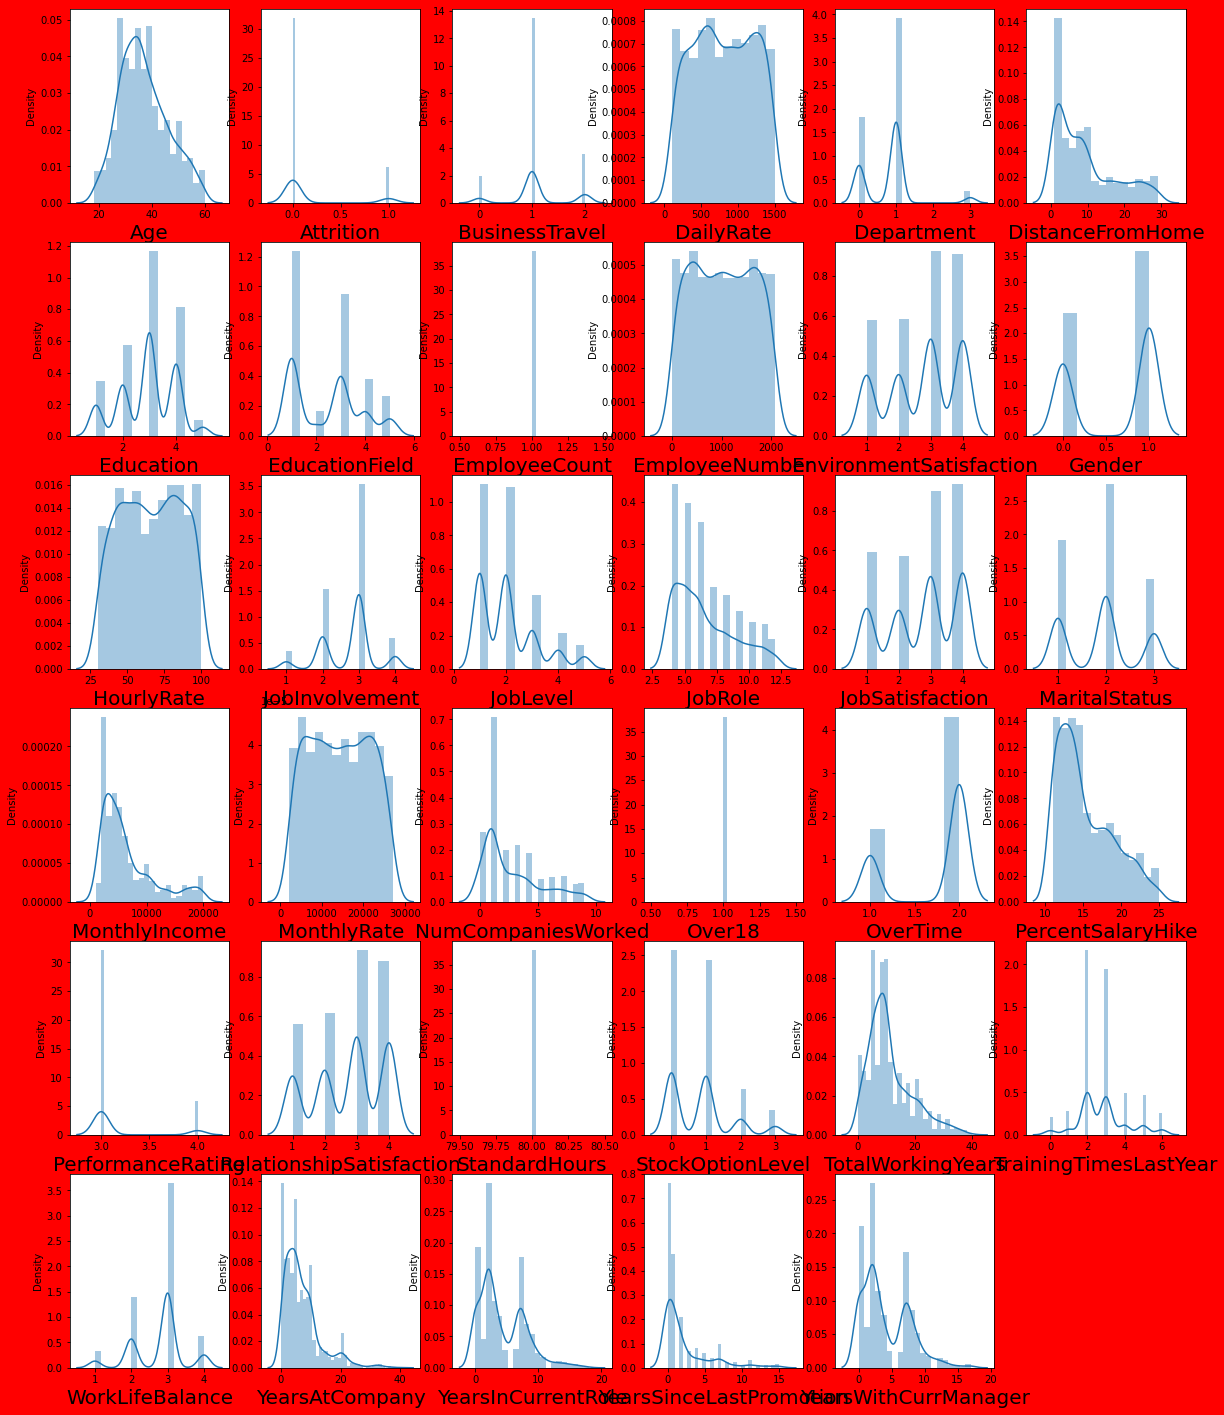

In [149]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='red')
plotnumber = 1


for column in data:
    if plotnumber<=35 :  # as there are 35 columns in the data
        ax= plt.subplot(6,6,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
        
    plotnumber+=1
plt.show()

The data distribution looks decent enough and there doesn't seem to be any skewness.Great let's go ahead. let's observe the relationship between independent variables and dependent variable.

In [153]:
# Divide data set into features and label
y=data['PerformanceRating']
x=data.drop(columns=['PerformanceRating'])

In [154]:
y

0       3
1       4
2       3
3       3
4       3
       ..
1465    3
1466    3
1467    4
1468    3
1469    3
Name: PerformanceRating, Length: 1470, dtype: int64

In [155]:
x

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,0,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,2,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,1,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,1,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,2,1023,0,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


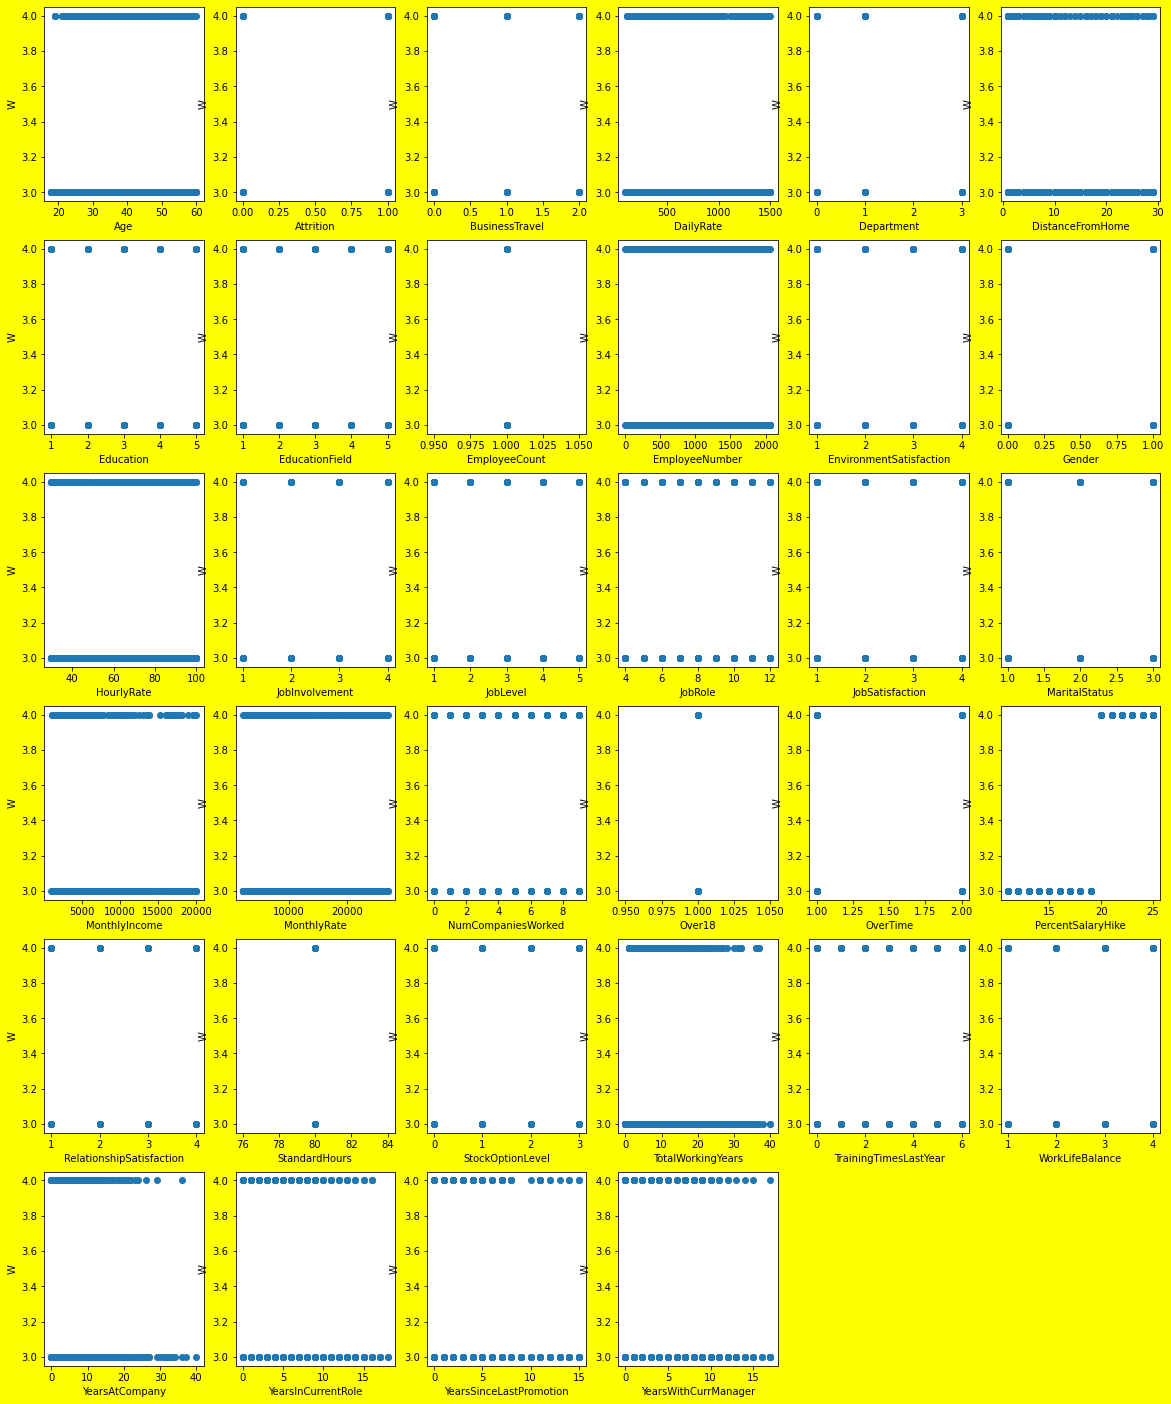

In [156]:
# Visualizing relationship
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1


for column in x:
    if plotnumber<=34 :  # as there are 34 columns in the data
        ax= plt.subplot(6,6,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('W',fontsize=10)
        
    plotnumber+=1
plt.show()


In [157]:
# Data scaling.formula Z=(x-mean)/std
scaler = StandardScaler()
x_scaled=scaler.fit_transform(x)

In [158]:
x_scaled

array([[ 0.4463504 ,  2.28090588, -0.16239918, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521, -0.4384223 ,  1.71733935, ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  ,  2.28090588, -0.16239918, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552, -0.4384223 , -0.16239918, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521, -0.4384223 ,  1.71733935, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256, -0.4384223 , -0.16239918, ..., -0.33939374,
        -0.36871529, -0.59522723]])

In [159]:
# split data into train and test. Model will be build on training data tested on test data.
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=348)
y_train.head()

557     3
689     3
1449    3
140     4
24      3
Name: PerformanceRating, dtype: int64

# Model instantiating and training

In [160]:
from sklearn.linear_model import LinearRegression

In [161]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

# predict the chance of win given feature

In [166]:
data.tail(2)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1468,49,0,2,1023,0,2,3,3,1,2065,4,1,63,2,2,4,2,2,5390,13243,2,1,2,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,0,1,628,1,8,3,3,1,2068,2,1,82,4,2,6,3,2,4404,10228,2,1,2,12,3,1,80,0,6,3,4,4,3,1,2


# you can save the model and later you can use it for prediction

In [167]:
import pickle

In [168]:
# saving the model to the local file system
pickle.dump(regression,open('reg_model','wb'))

In [ ]:
#prediction using the saved model
loaded_model=pickle.load(open('reg_model','rb'))
a=loaded_model.predict(scaler.transform([['650','5457','1324','260','36','148','426','1327','82','731','655','4.09','1','6','41','92']]))
a

In [ ]:
scaler.transform(scaler.transform([['650','5457','1324','260','36','148','426','1327','82','731','655','4.09','1','6','41','92']]))

# Let's check how well model fits on train data

In [169]:
# Adjust R2 score
regression.score(x_train,y_train)

0.6197788821092409

# Let's check how well model fits on test data

In [170]:
regression.score(x_test,y_test)

0.530468795176394

# Let's plot visualize

In [171]:
y_pred=regression.predict(x_test)

In [172]:
y_pred

array([3.20157538, 3.36204244, 3.55304128, 3.84355508, 3.62465415,
       2.8820489 , 2.97690462, 2.90569827, 3.15166645, 3.06140148,
       3.98986935, 2.83746121, 3.4342727 , 3.12384057, 3.23620685,
       2.91818689, 2.93165302, 3.4537101 , 3.04349666, 2.80400917,
       3.67225526, 3.0119663 , 3.14147231, 2.97492629, 3.35766086,
       3.89294153, 3.30213082, 3.01169449, 3.10119775, 2.83195185,
       3.16664418, 3.13769194, 3.46482451, 2.91691912, 3.00858242,
       3.19524212, 2.81893442, 3.03625416, 3.11459913, 3.01307012,
       3.08334905, 2.87724446, 3.69923219, 3.87374804, 3.55345228,
       3.07598345, 3.24621877, 2.87144606, 3.55998088, 3.86256554,
       2.93888482, 3.4207586 , 2.82192562, 3.68760875, 3.04924851,
       3.81560425, 3.07839325, 2.86938193, 2.90164888, 3.10338296,
       3.99330005, 2.87714158, 2.94515021, 3.84710332, 2.81353506,
       2.98057014, 2.9786012 , 3.16669026, 2.83367159, 2.91944039,
       2.86189046, 3.05356637, 3.05859381, 3.40521715, 3.04547

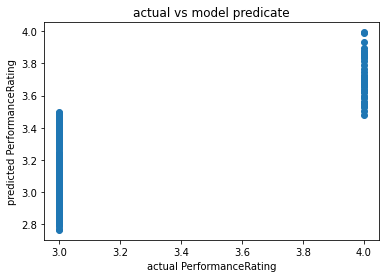

In [174]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual PerformanceRating")
plt.ylabel("predicted PerformanceRating")
plt.title('actual vs model predicate')
plt.show()

# Model evaluation

In [175]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [176]:
y_pred =regression.predict(x_test)

In [177]:
#MAE
mean_absolute_error(y_test,y_pred)

0.18210847948950684

In [178]:
#MSE
mean_squared_error(y_test,y_pred)

0.05230843341781179

In [179]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

0.22871037015800527

# you have succesfully complete building linear Regression model

# Regularization

In [180]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [181]:
lasscv= LassoCV(alphas=None,max_iter=100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [182]:
# best alpha parameter
alpha=lasscv.alpha_
alpha

0.0003512242932410393

In [183]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.0003512242932410393)

In [184]:
lasso_reg.score(x_test,y_test)

0.5326476042850276

# using ridge regression model

In [185]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [186]:
ridgecv.alpha_

0.030999999999999996

In [187]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.030999999999999996)

In [188]:
ridge_model.score(x_test,y_test)

0.53048037270305

# Data Preprocessing (Analysis(EDA))

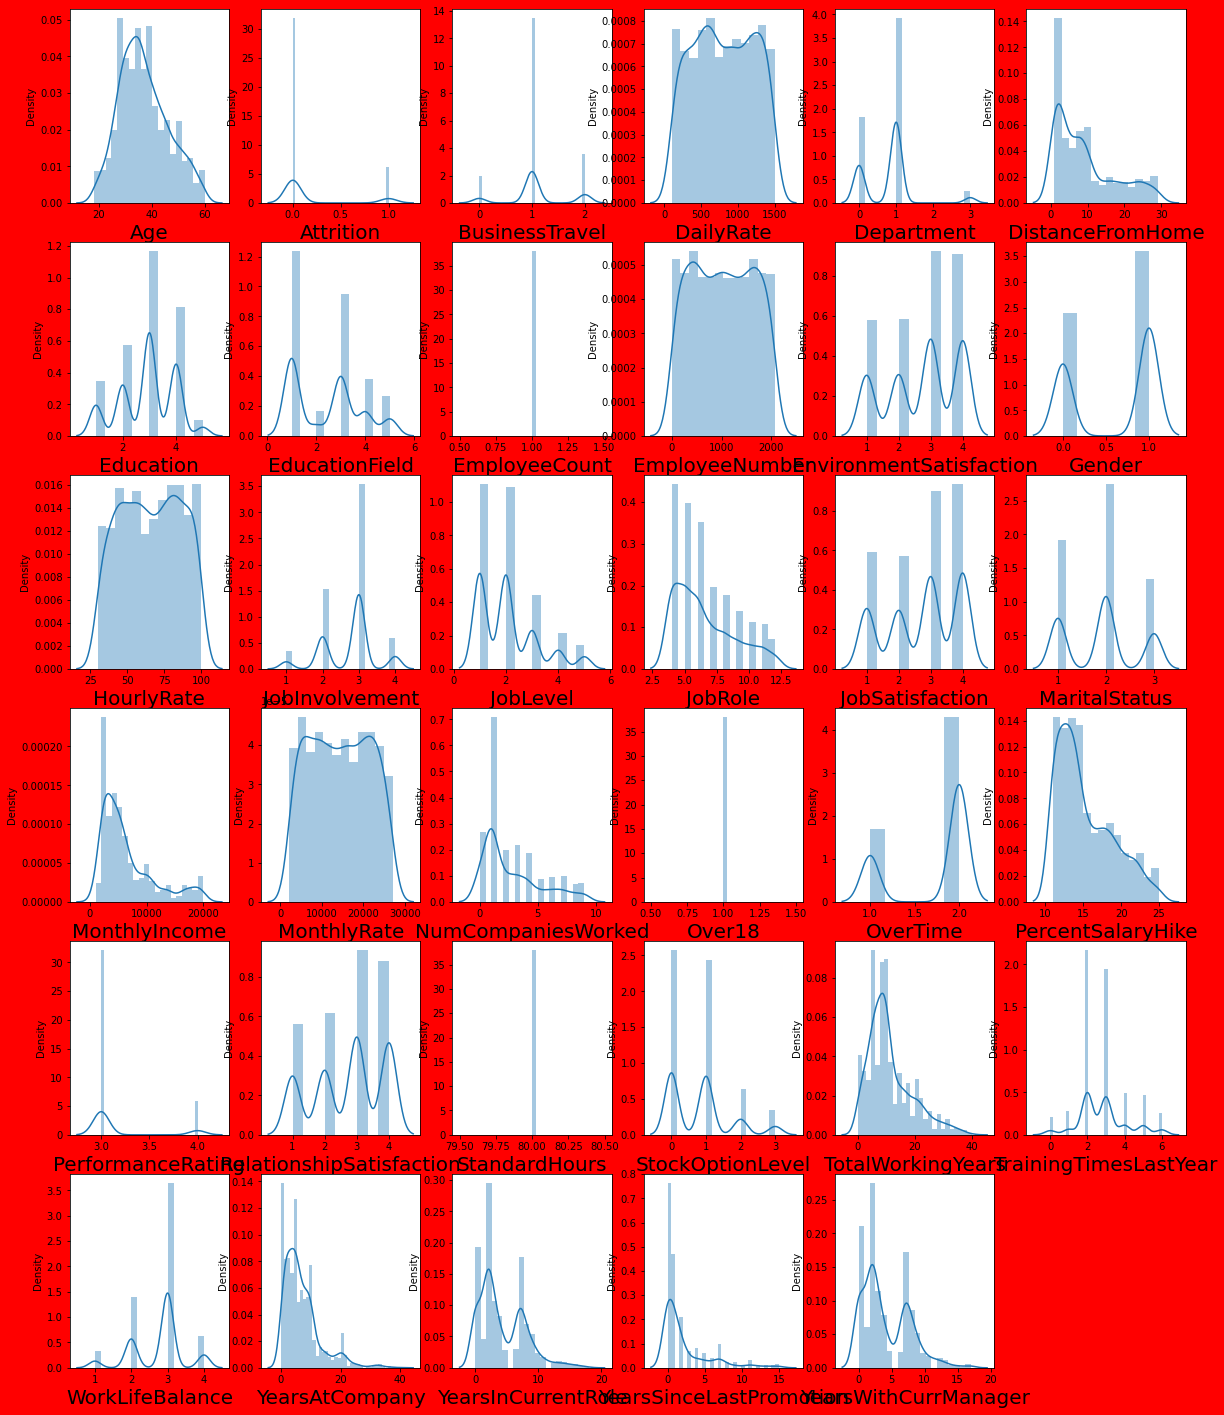

In [189]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='red')
plotnumber = 1


for column in data:
    if plotnumber<=35 :  # as there are 35 columns in the data
        ax= plt.subplot(6,6,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
        
    plotnumber+=1
plt.show()

We can see tere is some skewness in the data,let's deal with the data.

In [190]:
df_features=data.drop('PerformanceRating',axis=1)

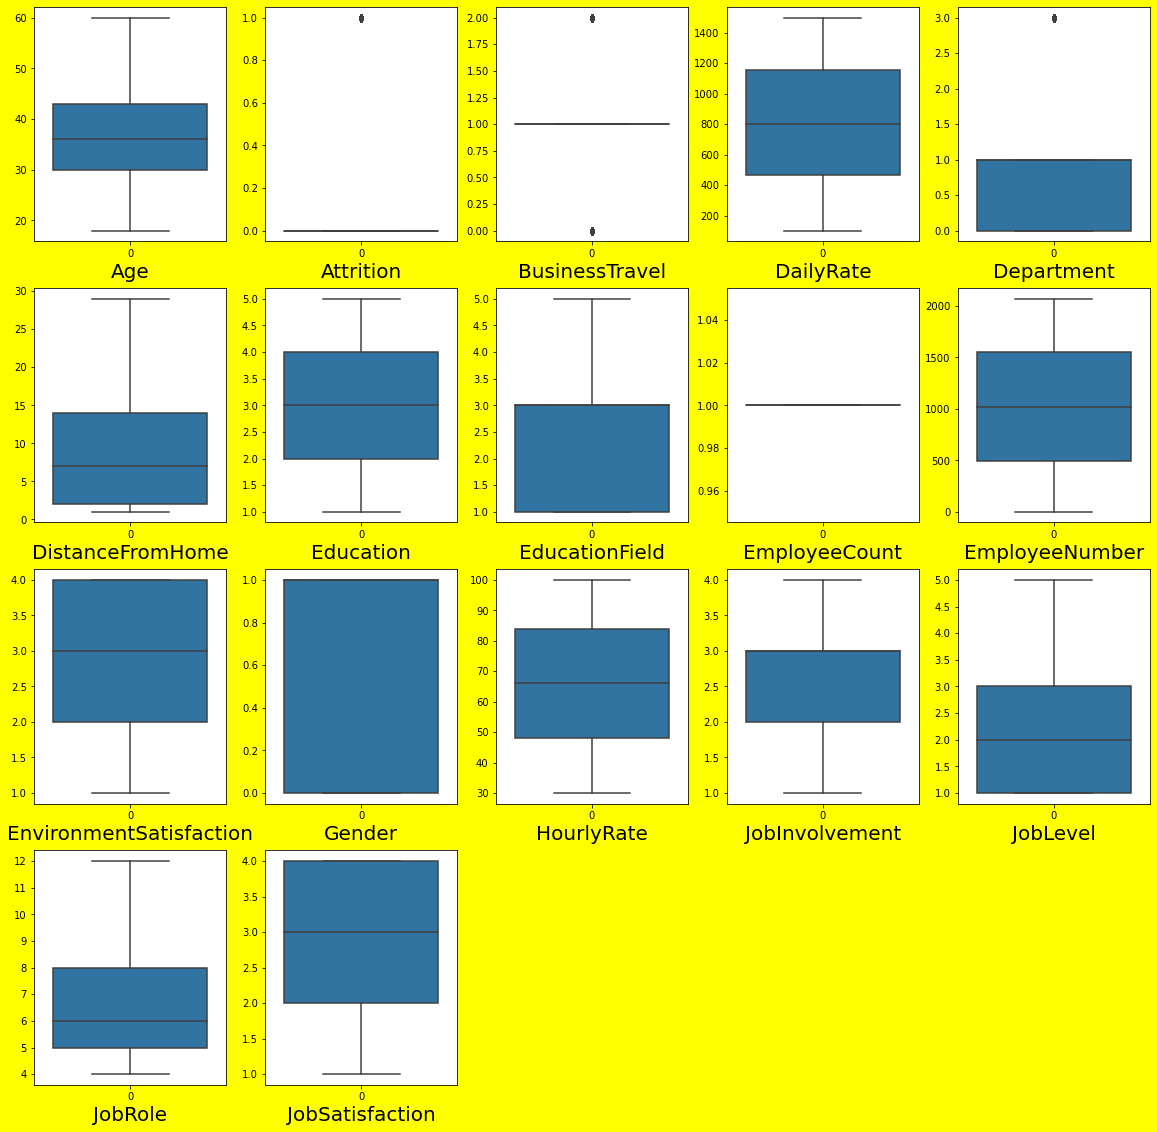

In [191]:
#Visualize the outliers using box plot
plt.figure(figsize=(20,25),facecolor='yellow')
graph = 1


for column in df_features:
    if graph<=17 :  # as there are 17 columns in the data
        plt.subplot(5,5,graph)
        ax = sns.boxplot(data=df_features[column])
        plt.xlabel(column,fontsize=20)
        
        
    graph+=1
plt.show()

It seems that there is skewness in 'Attrition','Business travel','department'.

In [192]:
data.shape

(1470, 35)

# Finding relationship.Wde want to keep only those features which have relationship with label.

In [193]:
x=data.drop(columns=['PerformanceRating'])
y=data['PerformanceRating']

Before we fit our data to a model. Let's visualize the relationship between our independent variables and categories.

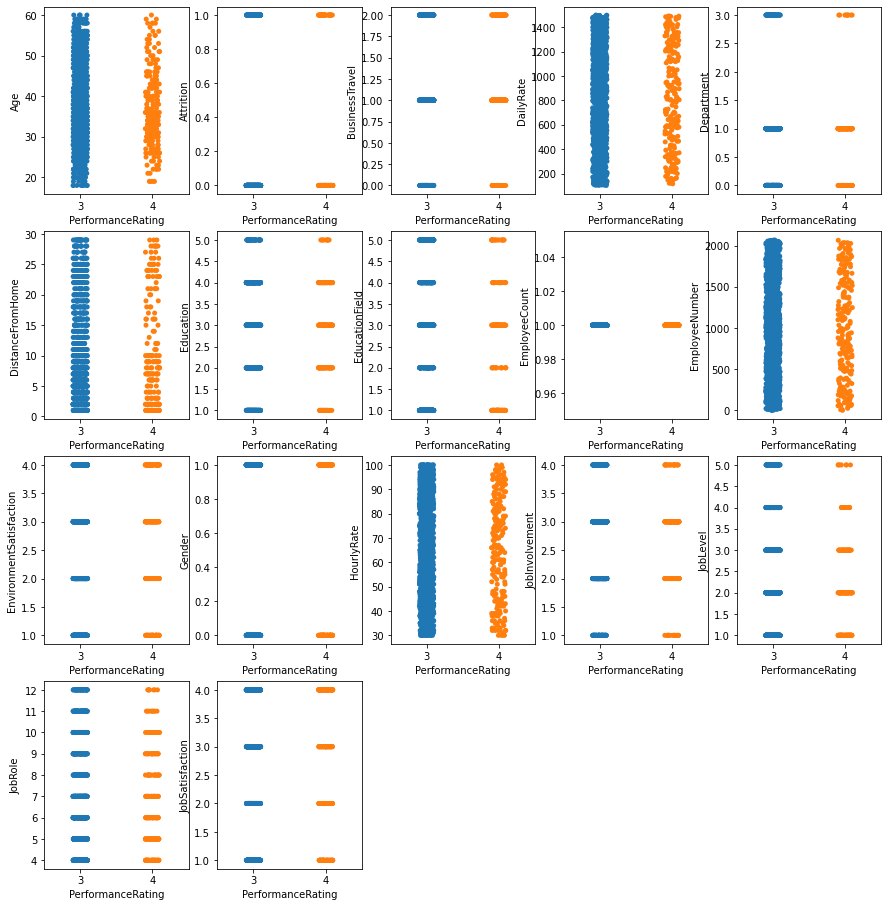

In [194]:
#Let's see how features are related to class
plt.figure(figsize=(15,20))
plotnumber = 1


for column in x:
    if plotnumber<=17 :  # as there are 17 columns in the data
        ax=plt.subplot(5,5,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.show()

# Check multicollinearity problem.Find if one feature is dependent on another feathure.¶

In [195]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

This is how our data looks now after scaling.Great,now we will check for multicollinearity usin VIF(variance inflation factor)

In [196]:
x_scaled.shape

(1470, 34)

In [197]:
#Finding variance inflation factor in each scaled column i.e. x_scaled.shape[1] (1/1-R2)
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["features"]=x.columns

#let's check the values
vif

,vif,features
0,2.064596,Age
1,1.306314,Attrition
2,1.030792,BusinessTravel
3,1.025373,DailyRate
4,1.491170,Department
5,1.026783,DistanceFromHome
6,1.065450,Education
7,1.021641,EducationField
8,NaN,EmployeeCount
9,1.023408,EmployeeNumber


This is non multicollinearity problem.

In [198]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [199]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

let's see how our model performs on the test data set.

In [200]:
y_pred =log_reg.predict(x_test)

In [201]:
y_pred

array([3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 4, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3,
       3, 4, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3,
       4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3,

In [202]:
#model accuracy 
accuracy=accuracy_score(y_test,y_pred)
accuracy

1.0

In [203]:
#Confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[316,   0],
       [  0,  52]], dtype=int64)

# similarly you can manually calculate recall/precision/F1score

In [204]:
from sklearn.metrics import classification_report

In [205]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       316
           4       1.00      1.00      1.00        52

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368



In [206]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,0,1,2,1,1,1,2,0,94,3,2,4,4,1,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,1,1,2,3,1,61,2,2,5,2,2,5130,24907,1,1,2,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,2,1,4,4,1,92,2,1,6,3,1,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,1,1,5,4,0,56,3,1,5,3,2,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,3,1,7,1,1,40,3,1,6,2,2,3468,16632,9,1,2,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,1,23,2,3,1,2061,3,1,41,4,2,6,4,2,2571,12290,4,1,2,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,1,613,1,6,1,3,1,2062,4,1,42,2,3,8,1,2,9991,21457,4,1,2,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,1,155,1,4,3,1,1,2064,2,1,87,4,2,7,2,2,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,2,1023,0,2,3,3,1,2065,4,1,63,2,2,4,2,2,5390,13243,2,1,2,14,3,4,80,0,17,3,2,9,6,0,8


# KNN

In [207]:
from sklearn.neighbors import KNeighborsClassifier

In [210]:
# Print summary
print('shape    ------>',data.shape)
print('Each column and data type and its count','\n')
print(data.info())

shape    ------> (1470, 35)
Each column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement         

In [211]:
# Dataframe statistics
data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.086395,802.485714,0.782313,9.192517,2.912925,2.425850,1.0,1024.865306,2.721769,0.600000,65.891156,2.729932,2.063946,6.553061,2.728571,1.902721,6502.931293,14313.103401,2.693197,1.0,1.717007,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.532170,403.509100,0.654013,8.106864,1.024165,1.364586,0.0,602.024335,1.093082,0.490065,20.329428,0.711561,1.106940,2.323902,1.102846,0.730121,4707.956783,7117.786044,2.498009,0.0,0.450606,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,1.0,1.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,0.000000,2.000000,2.000000,1.000000,1.0,491.250000,2.000000,0.000000,48.000000,2.000000,1.000000,5.000000,2.000000,1.000000,2911.000000,8047.000000,1.000000,1.0,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,1.000000,802.000000,1.000000,7.000000,3.000000,3.000000,1.0,1020.500000,3.000000,1.000000,66.000000,3.000000,2.000000,6.000000,3.000000,2.000000,4919.000000,14235.500000,2.000000,1.0,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1.000000,1157.000000,1.000000,14.000000,4.000000,3.000000,1.0,1555.750000,4.000000,1.000000,83.750000,3.000000,3.000000,8.000000,4.000000,2.000000,8379.000000,20461.500000,4.000000,1.0,2.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,3.000000,29.000000,5.000000,5.000000,1.0,2068.000000,4.000000,1.000000,100.000000,4.000000,5.000000,12.000000,4.000000,3.000000,19999.000000,26999.000000,9.000000,1.0,2.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [212]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

seems no other columns have nulls.it's safe to proceed.

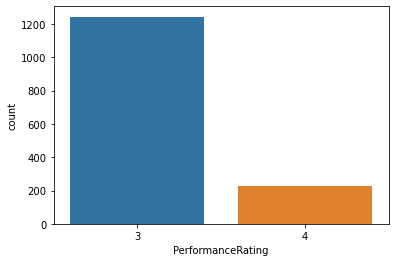

In [214]:
# plot each class frequency
sns.countplot(x='PerformanceRating',data=data)
plt.show()


# Using selectKBest feature selection method

selectkBest use f_classif function to find best features,where f_classif uses ANOVA test.

In [215]:
from sklearn.feature_selection import SelectKBest,f_classif

In [216]:
x=data.drop('PerformanceRating',axis=1)
y=data.PerformanceRating

In [217]:
best_features = SelectKBest(score_func=f_classif,k=17)
fit = best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

# concatenate dataframe
feature_scores =pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns = ['feature_Name','score']  # name output columns
print(feature_scores.nlargest(17,'score')) # print 17 best features

                feature_Name        score
23         PercentSalaryHike  2187.192786
31        YearsInCurrentRole     1.799091
24  RelationshipSatisfaction     1.444337
10   EnvironmentSatisfaction     1.282804
13            JobInvolvement     1.241719
5           DistanceFromHome     1.079673
7             EducationField     0.934374
6                  Education     0.884492
33      YearsWithCurrManager     0.765344
14                  JobLevel     0.661451
9             EmployeeNumber     0.608712
32   YearsSinceLastPromotion     0.470306
4                 Department     0.469311
18             MonthlyIncome     0.430396
28     TrainingTimesLastYear     0.356372
20        NumCompaniesWorked     0.291699
11                    Gender     0.282016


# Model Building

In [221]:
new_x = data[['PercentSalaryHike','YearsInCurrentRole','RelationshipSatisfaction','EnvironmentSatisfaction','JobInvolvement','DistanceFromHome','EducationField','Education','YearsWithCurrManager','JobLevel','EmployeeNumber','YearsSinceLastPromotion','Department','MonthlyIncome','TrainingTimesLastYear','NumCompaniesWorked','Gender']]

In [222]:
new_x

,PercentSalaryHike,YearsInCurrentRole,RelationshipSatisfaction,EnvironmentSatisfaction,JobInvolvement,DistanceFromHome,EducationField,Education,YearsWithCurrManager,JobLevel,EmployeeNumber,YearsSinceLastPromotion,Department,MonthlyIncome,TrainingTimesLastYear,NumCompaniesWorked,Gender
0,11,4,1,2,3,1,1,2,5,2,1,0,0,5993,0,8,0
1,23,7,4,3,2,8,1,1,7,2,2,1,1,5130,3,1,1
2,15,0,2,4,2,2,2,2,0,1,4,0,1,2090,3,6,1
3,11,7,3,4,3,3,1,4,0,1,5,3,1,2909,3,1,0
4,12,2,4,1,3,2,3,1,2,1,7,2,1,3468,3,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,17,2,3,3,4,23,3,2,3,2,2061,0,1,2571,3,4,1
1466,15,7,1,4,2,6,3,1,7,3,2062,1,1,9991,5,4,1
1467,20,2,2,2,4,4,1,3,3,2,2064,0,1,6142,0,1,1
1468,14,6,4,4,2,2,3,3,8,2,2065,0,0,5390,3,2,1


In [223]:
scalar=StandardScaler()
x_scalar=scalar.fit_transform(new_x)

In [224]:
# Building model to test unexposed data
x_train,x_test,y_train,y_test = train_test_split(x_scalar,y,test_size=0.25,random_state=355)

In [225]:
# Write one function  and call as many as times to check accuracy_score of different models
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n==================Train Result==================")
        print(f"Accuracy score : {accuracy_score(y_train,y_pred)*100:0.2f}%")
              
    elif train==False:
              pred=clf.predict(x_test)
              
              
              print("\n==================Train Result==================")
              print(f"Accuracy score : {accuracy_score(y_train,y_pred)*100:0.2f}%")
              
              print('\n \n Test clssaification Report \n',classification_report(y_test,pred,digits=2)) ## Model confidence/accuracy

In [226]:
# Initiate KNeighborsClassifier
knn=KNeighborsClassifier()

# Model Training
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [227]:
# Call the function and pass dataset to check train and test score
metric_score(knn,x_train,x_test,y_train,y_test,train=True)    # This is for training score
metric_score(knn,x_train,x_test,y_train,y_test,train=False)  #This is for test score


==================Train Result==================
Accuracy score : 93.65%

==================Train Result==================


UnboundLocalError: local variable 'y_pred' referenced before assignment

# cross validation

Cross validation score to check if the model overfitting

In [228]:
from sklearn.model_selection import KFold,cross_val_score

In [229]:
cross_val_score(knn,x_scalar,y,cv=3)

array([0.9122449 , 0.89591837, 0.9       ])

In [230]:
cross_val_score(KNeighborsClassifier(),x_scalar,y,cv=3).mean()

0.9027210884353741

# hyperparameter Tuning

In [231]:
from sklearn.model_selection import GridSearchCV

In [232]:
param_grid = {'algorithm' : ['kd_tree','brute'],
              'leaf_size' : [3,5,6,7,8],
               'n_neighbors' : [3,5,7,9,11,13]
             }

In [233]:
gridsearch=GridSearchCV(estimator=knn,cv=3,param_grid=param_grid)

In [234]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})